<a href="https://colab.research.google.com/github/scasasr/AlgorithmsUN2021I/blob/main/Lab6/scasasrAlgorithmicToolboxWeek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

4 11
15

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [ ]:
%%writefile output2.txt
4

Overwriting output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [ ]:
!python sum.py

32 90
122


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

6
23 1 89 56 34 5
4984


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Writing input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Writing input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile StressTest1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

int MaxPairwiseProduct1(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

long long MaxPairwiseProduct2(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {

    for (int j=0; j<20; j++) {

        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(1 + (rand() % (200000 - 1 + 1)));
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        int res1 = MaxPairwiseProduct1(a);
        long long res2 = MaxPairwiseProduct2(a);

        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
        }
        else {
            cout << "OK\n";
        }

    }


}

Overwriting StressTest1.cpp


In [ ]:
!g++ StressTest1.cpp -o StressTest1
!./StressTest1

4
130887 92778 36916 147794 
Wrong answer: 1160996008 19344313278
10
85387 160493 116650 41422 2363 90028 168691 120060 97764 113927 
Wrong answer: 2088920396 27073724663
9
183427 89173 55737 5212 195369 102568 156430 65783 21531 
Wrong answer: 1919983863 35835949563
8
65124 174068 103136 113930 179803 34023 123059 133070 
Wrong answer: 1822470173 31297948604
7
161394 18457 175012 78043 176230 177374 84422 
Wrong answer: 2089365940 31258620020
3
13785 98538 175199 
Wrong answer: 1358346330 17263759062
11
198316 64371 166414 3527 176092 68981 159957 41874 6863 199171 106997 
Wrong answer: 2122301002 39498796036
18
102306 20926 77085 136328 60337 126506 150847 21730 61314 125858 16125 153896 19583 100546 98815 33368 115435 190365 
Wrong answer: 2147249950 29296412040
2
113751 171088 
Wrong answer: 0 19461431088
15
117277 147179 95789 193585 105404 102652 192755 12400 199933 95061 149677 193369 147740 10013 36227 
Wrong answer: 2001929129 38704029805
7
148095 97540 140796 80571 51435 1603

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m7.508s
user	2m7.223s
sys	0m0.026s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Overwriting test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Overwriting max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of instruction that are executed in that line

In [ ]:
%%writefile max_pairwise_product_ef.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                                            //N inst exec by line executed
    int n = numbers.size();                                                                               //1

    int max_index1 = -1;                                                                                  //1
    for (int i = 0; i < n; ++i)                                                                           //1 + 2n
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1]))                                     //n
            max_index1 = i;                                                                               //[1, n]

    int max_index2 = -1;                                                                                  //1
    for (int j = 0; j < n; ++j)                                                                           //1 + 2n
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2])))              //n
            max_index2 = j;                                                                               //[1, n]

    return ((long long) (numbers[max_index1])) * numbers[max_index2];                                     //5 + 6n + [2, 2n]
}

int main() {
    
    int n;                                                                                                //1
    cin >> n;                                                                                             //1
    vector<int> numbers(n);                                                                               //n
    for (int i = 0; i < n; ++i) {                                                                         //1 + 2n
        cin >> numbers[i];                                                                                //n
    }

    long long result = MaxPairwiseProductFast(numbers);                                                   //5 + 6n + [2, 2n]
    cout << result << "\n";                                                                               //1

    return 0;
    
}

Overwriting max_pairwise_product_ef.cpp


Test with inputs 1 and 2



In [ ]:
!g++ max_pairwise_product_ef.cpp -o max_pairwise_product_ef
!time ./max_pairwise_product_ef < input1.txt

90

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [ ]:
!g++ max_pairwise_product_ef.cpp -o max_pairwise_product_ef
!time ./max_pairwise_product_ef < input2.txt

40000000000

real	0m0.003s
user	0m0.002s
sys	0m0.001s


Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_ef.cpp -o max_pairwise_product_ef
!time ./max_pairwise_product_ef < input3.txt

39999800000

real	0m0.071s
user	0m0.067s
sys	0m0.004s


20 stress tests

In [ ]:
%%writefile StressTest2.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                                            
    int n = numbers.size();                                                                               

    int max_index1 = -1;                                                                                  
    for (int i = 0; i < n; ++i)                                                                           
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1]))                                     
            max_index1 = i;                                                                               

    int max_index2 = -1;                                                                                 
    for (int j = 0; j < n; ++j)                                                                          
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2])))             
            max_index2 = j;                                                                              

    return ((long long) (numbers[max_index1])) * numbers[max_index2];                                     
}

long long MaxPairwiseProduct2(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {

    for (int j=0; j<20; j++) {

        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(1 + (rand() % (200000 - 1 + 1)));
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProduct2(a);
        long long res2 = MaxPairwiseProductFast(a);

        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
        }
        else {
            cout << "OK\n";
        }

    }


}

Overwriting StressTest2.cpp


In [ ]:
!g++ StressTest2.cpp -o StressTest2
!./StressTest2

4
130887 92778 36916 147794 
OK
10
85387 160493 116650 41422 2363 90028 168691 120060 97764 113927 
OK
9
183427 89173 55737 5212 195369 102568 156430 65783 21531 
OK
8
65124 174068 103136 113930 179803 34023 123059 133070 
OK
7
161394 18457 175012 78043 176230 177374 84422 
OK
3
13785 98538 175199 
OK
11
198316 64371 166414 3527 176092 68981 159957 41874 6863 199171 106997 
OK
18
102306 20926 77085 136328 60337 126506 150847 21730 61314 125858 16125 153896 19583 100546 98815 33368 115435 190365 
OK
2
113751 171088 
OK
15
117277 147179 95789 193585 105404 102652 192755 12400 199933 95061 149677 193369 147740 10013 36227 
OK
7
148095 97540 140796 80571 51435 160379 97468 
OK
15
110098 12903 173318 170493 126653 60757 197302 160281 124287 9442 153866 29690 28445 146620 158441 
OK
13
158032 108118 138098 105772 34482 90676 120710 98928 104568 177857 179498 72354 54587 
OK
6
55307 164684 6220 28625 51529 132872 
OK
17
48830 9504 130020 58271 163369 159709 86716 26341 118150 147797 100724 14

Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile max_pairwise_product_ef_execints.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long execints =0LL;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                       //N inst exec by line executed
    
    long long m = 0LL;
    
    int n = numbers.size();                                                                               //1
    execints++;

    int max_index1 = -1;                                                                                  //1
    execints++;

    execints++;
    for (int i = 0; i < n; ++i) {                                                                         //1 + 2n
        execints += 2;

        execints++;
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])) {                                   //n

            m++;

            max_index1 = i;                                                                               //[1, n]
            execints++;
        }
    }

    cout << m << "\n";

    m = 0LL;

    int max_index2 = -1;                                                                                  //1
    execints++;

    execints++;
    for (int j = 0; j < n; ++j) {                                                                         //1 + 2n
        execints += 2;

        execints++;
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))) {            //n

            m++;

            max_index2 = j;                                                                               //[1, n]
            execints++;
        }
    }

    cout << m << "\n";

    execints++;
    return ((long long) (numbers[max_index1])) * numbers[max_index2];                                     //5 + 6n + [2, 2n]

}

int main() {

    int n;                                                                                                //1
    execints++;

    cin >> n;                                                                                             //1
    execints++;

    vector<int> numbers(n);                                                                               //n
    execints += n;

    execints++;
    for (int i = 0; i < n; ++i) {                                                                         //1 + 2n                    
        execints += 2;

        cin >> numbers[i];                                                                                //n
        execints++;
    }

    long long result = MaxPairwiseProductFast(numbers);                                                   //6 + 6n + [2, 2n]

    cout << result << "\n";                                                                               //1
    execints++;

    cout << execints << "\n";

    return 0;                                                                                   //-------------------
                                                                                                //10 + 10n + [2, 2n]
    
}

Overwriting max_pairwise_product_ef_execints.cpp


Calculate estimated time by instruction and number of instructions by second

In [ ]:
!g++ max_pairwise_product_ef_execints.cpp -o max_pairwise_product_ef_execints
!time ./max_pairwise_product_ef_execints < input1.txt

10
9
90
129

real	0m0.003s
user	0m0.000s
sys	0m0.003s


For the input 1 we have:

$ T = 10 + 10(10) + 10 + 9 = 129 $

In [ ]:
!g++ max_pairwise_product_ef_execints.cpp -o max_pairwise_product_ef_execints
!time ./max_pairwise_product_ef_execints < input2.txt

3
4
40000000000
77

real	0m0.003s
user	0m0.001s
sys	0m0.002s


For the input 2 we have:

$ T = 10 + 10(6) + 3 + 4 = 77 $

In [ ]:
!g++ max_pairwise_product_ef_execints.cpp -o max_pairwise_product_ef_execints
!time ./max_pairwise_product_ef_execints < input3.txt

200000
199999
39999800000
2400009

real	0m0.063s
user	0m0.060s
sys	0m0.002s


For the input 3 we have:

$ T = 10 + 10(200000) + 200000 + 199999 = 2400009 $

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

0.067/2400009

2.7916561979559246e-08

In [ ]:
# Estimated number of instructions by second

1/(0.067/2400009)

35821029.85074627

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_superef.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

int main() {
    
    int n;                                                                      //1
    int actual_num;                                                             //1
    int aux;                                                                    //1
    int max1 = -1;                                                              //1
    int max2 = -1;                                                              //1
    cin >> n;                                                                   //1

    for (int i = 0; i < n; ++i) {                                               //1 + 2n
        cin >> actual_num;                                                      //1

        if (max1 == -1) {                                                       //1
            max1 = actual_num;                                                  //[1, n]
        }
        
        else if (actual_num > max1) {                                           //1
            aux = max1;                                                         //[0, n]
            max1 = actual_num;                                                  //[0, n]
            max2 = aux;                                                         //[0, n]
        }
        
        else if ((max2 == -1) || (actual_num > max2)) {                         //1
            max2 = actual_num;                                                  //[0, n]
        }
        
    }

    cout << (long long) max1*max2 << "\n";                                      //1

    return 0;                                                                   //----------------------
                                                                                //12 + 2n + [1, 5n]
    
}

Writing max_pairwise_product_superef.cpp


Test with inputs 1 and 2


 

In [ ]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input1.txt

90

real	0m0.003s
user	0m0.000s
sys	0m0.003s


In [ ]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input2.txt

40000000000

real	0m0.003s
user	0m0.002s
sys	0m0.001s


Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input3.txt

39999800000

real	0m0.058s
user	0m0.056s
sys	0m0.002s


20 stress tests 

In [ ]:
%%writefile StressTest3.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                                            
    int n = numbers.size();                                                                               

    int max_index1 = -1;                                                                                  
    for (int i = 0; i < n; ++i)                                                                           
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1]))                                     
            max_index1 = i;                                                                               

    int max_index2 = -1;                                                                                 
    for (int j = 0; j < n; ++j)                                                                          
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2])))             
            max_index2 = j;                                                                              

    return ((long long) (numbers[max_index1])) * numbers[max_index2];                                     
}

int main() {

    for (int j=0; j<20; j++) {
        
        long long actual_num;
        long long aux;
        long long max1 = -1;
        long long max2 = -1;

        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            
            actual_num = 1 + (rand() % (200000 - 1 + 1));

            a.push_back(actual_num);

            if (max1 == -1) {
                max1 = actual_num;
            }
            
            else if (actual_num > max1) {
                aux = max1;
                max1 = actual_num;
                max2 = aux;
            }
            
            else if ((max2 == -1) || (actual_num > max2)) {
                max2 = actual_num;
            }

        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProductFast(a);
        long long res2 = max1*max2;

        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
        }
        else {
            cout << "OK\n";
        }

    }


}

Overwriting StressTest3.cpp


In [ ]:
!g++ StressTest3.cpp -o StressTest3
!./StressTest3

4
130887 92778 36916 147794 
OK
10
85387 160493 116650 41422 2363 90028 168691 120060 97764 113927 
OK
9
183427 89173 55737 5212 195369 102568 156430 65783 21531 
OK
8
65124 174068 103136 113930 179803 34023 123059 133070 
OK
7
161394 18457 175012 78043 176230 177374 84422 
OK
3
13785 98538 175199 
OK
11
198316 64371 166414 3527 176092 68981 159957 41874 6863 199171 106997 
OK
18
102306 20926 77085 136328 60337 126506 150847 21730 61314 125858 16125 153896 19583 100546 98815 33368 115435 190365 
OK
2
113751 171088 
OK
15
117277 147179 95789 193585 105404 102652 192755 12400 199933 95061 149677 193369 147740 10013 36227 
OK
7
148095 97540 140796 80571 51435 160379 97468 
OK
15
110098 12903 173318 170493 126653 60757 197302 160281 124287 9442 153866 29690 28445 146620 158441 
OK
13
158032 108118 138098 105772 34482 90676 120710 98928 104568 177857 179498 72354 54587 
OK
6
55307 164684 6220 28625 51529 132872 
OK
17
48830 9504 130020 58271 163369 159709 86716 26341 118150 147797 100724 14

Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile max_pairwise_product_superef_execints.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long execints = 0LL;

int main() {
    
    int n;                                                                      //1
    execints++;

    int m = 0;

    int actual_num;                                                             //1
    execints++;

    int aux;                                                                    //1
    execints++;

    int max1 = -1;                                                              //1
    execints++;

    int max2 = -1;                                                              //1
    execints++;

    cin >> n;                                                                   //1
    execints++;

    execints++;
    for (int i = 0; i < n; ++i) {                                               //1 + 2n
        execints += 2;                       

        cin >> actual_num;                                                      //n
        execints++;

        execints++;
        if (max1 == -1) {                                                       //n
            max1 = actual_num;                                                  //[1, n]
            execints++;
            m++;
        }

        else if (actual_num > max1) {                                           //[0, n]
            aux = max1;                                                         //[0, n]
            execints++;
            max1 = actual_num;                                                  //[0, n]
            execints++;
            max2 = aux;                                                         //[0, n]
            execints++;
            m += 3;
        }

        else if ((max2 == -1) || (actual_num > max2)) {                         //[0, n]
            max2 = actual_num;                                                  //[0, n]
            execints++;
            m++;
        }
        
    }

    cout << m << "\n";

    execints++;
    cout << (long long) max1*max2 << "\n";                                      //1

    cout << execints << "\n";

    return 0;                                                                   //----------------------
                                                                                //8 + 4n + [1, 7n]
    
}

Overwriting max_pairwise_product_superef_execints.cpp


In [ ]:
!g++ max_pairwise_product_superef_execints.cpp -o max_pairwise_product_superef_execints
!time ./max_pairwise_product_superef_execints < input1.txt

28
90
76

real	0m0.003s
user	0m0.003s
sys	0m0.000s


input 1:

$T = 8 + 4(10) + 28 = 76$

In [ ]:
!g++ max_pairwise_product_superef_execints.cpp -o max_pairwise_product_superef_execints
!time ./max_pairwise_product_superef_execints < input2.txt

9
40000000000
41

real	0m0.003s
user	0m0.002s
sys	0m0.001s


input 2:

$T=8+4(6)+9 = 41$

In [ ]:
!g++ max_pairwise_product_superef_execints.cpp -o max_pairwise_product_superef_execints
!time ./max_pairwise_product_superef_execints < input3.txt

599998
39999800000
1400006

real	0m0.060s
user	0m0.058s
sys	0m0.002s


input 3:

$T=8+4(200000)+599998=1400006$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

0.056/1400006

3.9999828572163264e-08

In [ ]:
# Estimated number of instructions by second

1/(0.056/1600005)

28571517.85714286

## Python

Efficient cython file reading, string parsing, and array building

https://stackoverflow.com/questions/37219875/efficient-cython-file-reading-string-parsing-and-array-building



File PreProcessing With C and Cython

https://github.com/EveryTimeIWill18/Cython_Repo/blob/master/FastFileProcessingWithCython.ipynb



In [ ]:
%load_ext Cython

In [ ]:
%%cython
# distutils: extra_compile_args = -fopenmp
# distutils: extra_link_args = -fopenmp
# cython: language_level=3
# cython: embedsignature=True
# cython: profile=True
# cython: boundscheck=False
# coding: utf8

from libc.stdlib cimport malloc, realloc, free
from libc.stdio cimport fopen, fclose, FILE, EOF, fseek, SEEK_END, SEEK_SET
from libc.stdio cimport ftell, fgetc, fgets, getc, gets, feof, fread, getline
from libc.string cimport strlen, memcpy, strcpy, strtok, strchr, strncpy
from cython.parallel import prange, parallel, threadid

# - C structure that is set to readonly
cdef readonly struct FileContents:
    char *contents
    
cdef class CyReadFile:
    """Read in the contents of a file."""
    cdef:
        FileContents *File
        FILE *fp
        char *filename
        char *delimiter
        long file_size
        bint is_open
        bint EO_STR
    
    def __init__(self, char *delimiter, char *filename):
        self.File = <FileContents*>malloc(sizeof(CyReadFile))
        self.delimiter = delimiter
        self.filename = filename
        self.File.contents = NULL
        self.is_open = 0
        self.EO_STR = 0
        self.file_size = 0
        self.fp = NULL
        
    def open_file(self):
        """Open the file for reading."""
        self.fp = fopen(self.filename, "r")
        if self.fp == NULL:
            raise FileNotFoundError(2, "No such file or directory: '%s'" % self.filename)
        else:
            # file is now open
            self.is_open = 1
    
    def read_in_file(self):
        """Read in the entire file."""
        if self.is_open == 1:
            # get the length of the file
            fseek(self.fp, 0, SEEK_END)
            self.file_size = ftell(self.fp)
            fseek(self.fp, 0, SEEK_SET)
            # allocate memory for reading in the file
            self.File.contents = <char*>malloc(self.file_size*sizeof(char))
            # read entire file into the struct
            fread(self.File.contents, 1, self.file_size, self.fp)
            # close the file once it's read into the char array
            fclose(self.fp)
            # set is_open to 0
            self.is_open = 0
              
    def read_file_in_parallel(self):
        """Bypass the gil and read in the file."""
        if self.is_open == 1:
            with nogil:
                # get the length of the file
                fseek(self.fp, 0, SEEK_END)
                self.file_size = ftell(self.fp)
                fseek(self.fp, 0, SEEK_SET)
                # allocate memory for reading in the file
                self.File.contents = <char*>malloc(self.file_size*sizeof(char))
                # read entire file into the struct
                fread(self.File.contents, 1, self.file_size, self.fp)
                # close the file once it's read into the char array
                fclose(self.fp)
                # set is_open to 0
                self.is_open = 0
    
    def __dealloc__(self):
        """Deallocate memory"""
        free(self.File.contents)
        free(self.File)
        free(self.fp)
        free(self.filename)
        free(self.delimiter)
        

class PyReadFile(CyReadFile):
    """A python wrapper around a cython class."""
    def __init__(self, emlFile):
        super().__init__(b',', emlFile)
    
        
def py_read_file(filename):
    with open(filename, "r") as f:
        return f.read()

### Brute Force

In [ ]:
def max_pairwise_product(n, a):

    result = 0                                                                  #1
    aux_product = 0                                                             #1

    for i in range(0, n):                                                       #1 + 2n
        for j in range(i + 1, n):                                               #n+ (n-1)n
            aux_product = a[i] * a[j]                                           #(n-1)n/2
            if aux_product > result:                                            #(n-1)n/2
                result = aux_product                                            #[0, (n-1)n/2]
    return result                                                               #--------------
                                                                                #3 + 3n + [2(n-1)n, 2.5 (n-1)n]

$T=9+6n+[2(n−1)n,2.5(n−1)n]$

Tests with inputs 1 and 2

In [ ]:
pyrf1 = PyReadFile(b"input1.txt")                                               #1
scan = py_read_file(b"input1.txt").split()                                      #1

n = int(scan[0])                                                                #1
a = []                                                                          #1

for i in range(1, len(scan)):                                                   #1 + 2n
    a.append(int(scan[i]))                                                      #n

print(max_pairwise_product(n, a))                                               #4 + 3n + [2(n-1)n, 2.5 (n-1)n]

                                                                                #------------------
                                                                                #8 + 6n + [2(n-1)n, 2.5 (n-1)n]

90


In [ ]:
pyrf2 = PyReadFile(b"input2.txt")
scan = py_read_file(b"input2.txt").split()

n = int(scan[0])
a = []

for i in range(1, len(scan)):
    a.append(int(scan[i]))

print(max_pairwise_product(n, a))

40000000000


Test and time with input 3:

In [ ]:
%%time

pyrf3 = PyReadFile(b"input3.txt")
scan = py_read_file(b"input3.txt").split()

n = int(scan[0])
a = []

for i in range(1, len(scan)):
    a.append(int(scan[i]))

print(max_pairwise_product(n, a))

39999800000
CPU times: user 41min 39s, sys: 5.01 s, total: 41min 44s
Wall time: 41min 43s


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
def max_pairwise_product(n, a, execints):

    result = 0                                                                  #1
    m = 0
    execints+=1
    aux_product = 0                                                             #1
    execints+=1

    execints+=1
    for i in range(0, n):                                                       #1 + 2n
        execints += 2
        execints+=1
        for j in range(i + 1, n):                                               #n+ (n-1)n
            execints += 2
            aux_product = a[i] * a[j]                                           #(n-1)n/2
            execints+=1
            execints+=1
            if aux_product > result:                                            #(n-1)n/2
                result = aux_product                                            #[0, (n-1)n/2]
                execints+=1
                m+=1
    return result, execints, m                                                  #--------------
                                                                                #3 + 3n + [2(n-1)n, 2.5 (n-1)n]

In [ ]:
%%time

pyrf4 = PyReadFile(b"input1.txt")
scan = py_read_file(b"input1.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product(n, a, execints)

print(res)
print(m)
print(execints)

90
30
278
CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 8.25 ms


input 1:

$T= 8 + 6(10) + 2(9)(10) + 30 = 278$

In [ ]:
%%time

pyrf5 = PyReadFile(b"input2.txt")
scan = py_read_file(b"input2.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product(n, a, execints)

print(res)
print(m)
print(execints)

40000000000
5
109
CPU times: user 373 µs, sys: 0 ns, total: 373 µs
Wall time: 325 µs


input 2:

$T=8+6(6)+2(5)(6)+5=109$

In [ ]:
%%time

pyrf6 = PyReadFile(b"input3.txt")
scan = py_read_file(b"input3.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product(n, a, execints)

print(res)
print(m)
print(execints)

39999800000
2672068
80003472076
CPU times: user 1h 48min 44s, sys: 7.39 s, total: 1h 48min 52s
Wall time: 1h 48min 51s


input 3:

$T=8+6(200000)+2(199999)(200000)+2672068=80003472076$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
#Estimated time by instruction
2499/80003472076

3.12361443216621e-08

In [ ]:
# Estimated number of instructions by second
1/(2499/80003472076)

32014194.508203283

### Efficient solution

In [ ]:
def max_pairwise_product_fast(n, numbers):
    max_index1 = -1                                                             #1
    for i in range(n):                                                          #1 + 2n
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:                #n
            max_index1 = i                                                      #[1, n]

    max_index2 = -1                                                                     #1
    for i in range(n):                                                                  #1 + 2n
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):        #n
            max_index2 = i                                                                    #[1, n]

    return numbers[max_index1] * numbers[max_index2]                                  #----------------
                                                                                      #4 + 6n + [2, 2n]

Tests with inputs 1 and 2

In [ ]:
pyrf7 = PyReadFile(b"input1.txt")                                               #1
scan = py_read_file(b"input1.txt").split()                                      #1

n = int(scan[0])                                                                #1
a = []                                                                          

for i in range(1, len(scan)):                                                   #1 + 2n
    a.append(int(scan[i]))                                                      #n

print(max_pairwise_product_fast(n, a))                                          #5 + 6n + [2, 2n]

                                                                                #------------------
                                                                                #9 + 9n + [2, 2n]

90


In [ ]:
pyrf8 = PyReadFile(b"input2.txt")                                               
scan = py_read_file(b"input2.txt").split()                                     

n = int(scan[0])                                                               
a = []                                                                         

for i in range(1, len(scan)):                                                   
    a.append(int(scan[i]))                                                      

print(max_pairwise_product_fast(n, a))

40000000000


Test and time with input 3

In [ ]:
%%time

pyrf9 = PyReadFile(b"input3.txt")                                               
scan = py_read_file(b"input3.txt").split()                                     

n = int(scan[0])                                                               
a = []                                                                         

for i in range(1, len(scan)):                                                   
    a.append(int(scan[i]))                                                      

print(max_pairwise_product_fast(n, a))

39999800000
CPU times: user 148 ms, sys: 13.8 ms, total: 161 ms
Wall time: 166 ms


20 Stress tests

In [ ]:
from random import randint

def max_pairwise_product(n, a):

    result = 0

    for i in range(0, n):
        for j in range(i + 1, n):
            if a[i] * a[j] > result:
                result = a[i] * a[j]
    return result

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1                                                             
    for i in range(n):                                                          
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:                
            max_index1 = i                                                      

    max_index2 = -1                                                                     
    for i in range(n):                                                                  
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):        
            max_index2 = i                                                                    

    return numbers[max_index1] * numbers[max_index2]      

if __name__ == '__main__':

    for i in range(20):
      
      n = randint(2, 10)

      print(n)

      a = []
      max1 = -1
      max2 = -1

      for j in range(n):

          actual_num = randint(1, 200000)
          print(actual_num, end=" ")

          a.append(actual_num)

          if max1 == -1:
              max1 = actual_num
          
          elif actual_num > max1:
              aux = max1
              max1 = actual_num
              max2 = aux
          
          elif (max2 == -1) or (actual_num > max2):
              max2 = actual_num

      res1 = max_pairwise_product(n, a)
      res2 = max_pairwise_product_fast(n, a)

      print()

      if res1 != res2:
          print("Wrong answer:", res1, res2, "\n")
          break

      else:
          print("OK \n")

7
144796 96155 18677 44214 36841 177762 60170 
OK 

3
24827 110536 174463 
OK 

5
160253 62852 12672 153027 74783 
OK 

3
123366 148590 155478 
OK 

6
40310 8775 56996 119693 181889 109002 
OK 

2
24165 77155 
OK 

4
161835 199037 12190 47087 
OK 

4
164490 184654 131036 43775 
OK 

8
15081 119869 54282 125422 73294 102684 137327 113808 
OK 

2
19613 19858 
OK 

6
186475 80387 157069 25891 179484 83755 
OK 

10
142733 142604 114794 3937 85080 70542 21952 161098 12914 156967 
OK 

10
109006 38196 157158 132376 90861 130487 33162 106698 40931 177021 
OK 

8
195603 170374 75872 73214 122912 116807 93183 30695 
OK 

4
119017 106169 4464 29916 
OK 

6
194086 69706 179965 165974 173597 22244 
OK 

5
168296 35359 98945 41252 10087 
OK 

7
187619 95736 135798 168281 165435 117251 113103 
OK 

3
145860 171871 57644 
OK 

10
5956 108860 126322 158799 4289 59395 163744 160834 155397 63903 
OK 



Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
def max_pairwise_product_fast(n, numbers, execints):

    m = 0

    max_index1 = -1                                                             #1
    execints += 1

    execints += 1
    for i in range(n):                                                          #1 + 2n
        execints += 2

        execints += 1
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:                #n
            max_index1 = i                                                      #[1, n]
            execints += 1
            m += 1

    max_index2 = -1                                                             #1
    execints += 1

    execints += 1
    for i in range(n):                                                          #1 + 2n
        execints += 2

        execints += 1
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):              #n
            max_index2 = i                                                                          #[1, n]
            execints += 1
            m += 1

    return numbers[max_index1] * numbers[max_index2], execints, m                               #-------------------
                                                                                                #4 + 6n + [2, 2n]

$T=10 + 9n + [2, 2n]$

In [ ]:
%%time

pyrf10 = PyReadFile(b"input1.txt")
scan = py_read_file(b"input1.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product_fast(n, a, execints)

print(res)
print(m)
print(execints)

90
19
118
CPU times: user 5.02 ms, sys: 1 ms, total: 6.02 ms
Wall time: 6.27 ms


input 1:

$T=9+9(10)+19 = 118$

In [ ]:
%%time

pyrf11 = PyReadFile(b"input2.txt")
scan = py_read_file(b"input2.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product_fast(n, a, execints)

print(res)
print(m)
print(execints)

40000000000
7
70
CPU times: user 0 ns, sys: 635 µs, total: 635 µs
Wall time: 3.02 ms


input 2:

$T=9+9(6)+7 = 70$

In [ ]:
%%time

pyrf12 = PyReadFile(b"input3.txt")
scan = py_read_file(b"input3.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product_fast(n, a, execints)

print(res)
print(m)
print(execints)

39999800000
399999
2200008
CPU times: user 238 ms, sys: 11 ms, total: 249 ms
Wall time: 250 ms


input 3:

$T=9+9(200000)+399999 = 2200008$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
#Estimated time by instruction
0.148/2200008

6.727248264551765e-08

In [ ]:
# Estimated number of instructions by second
1/(0.148/2200008)

14864918.918918919

###Super efficient solution

Test with inputs 1 and 2

In [ ]:
if __name__ == '__main__':

    pyrf13 = PyReadFile(b"input1.txt")                                          #1
    scan = py_read_file(b"input1.txt").split()                                  #1

    n = scan[0]                                                                 #1
    a = map(int, scan[1:])                                                      #1

    max1 = -1                                                                   #1
    max2 = -1                                                                   #1

    for actual_num in a:                                                        #1 + 2n
        if max1 == -1:                                                          #n
            max1 = actual_num                                                   #[0, n]
        
        elif actual_num > max1:                                                 #[0, n]
            aux = max1                                                          #[0, n]
            max1 = actual_num                                                   #[0, n]
            max2 = aux                                                          #[0, n]
        
        elif (actual_num == -1) or (actual_num > max2):                         #[0, n]
            max2 = actual_num                                                   #[0, n]

    print(max1*max2)

90


In [ ]:
if __name__ == '__main__':

    pyrf14 = PyReadFile(b"input2.txt")                                          #1
    scan = py_read_file(b"input2.txt").split()                                  #1

    n = scan[0]                                                                 #1
    a = map(int, scan[1:])                                                      #1

    max1 = -1                                                                   #1
    max2 = -1                                                                   #1

    for actual_num in a:                                                        #1 + 2n
        if max1 == -1:                                                          #n
            max1 = actual_num                                                   #[0, n]
        
        elif actual_num > max1:                                                 #[0, n]
            aux = max1                                                          #[0, n]
            max1 = actual_num                                                   #[0, n]
            max2 = aux                                                          #[0, n]
        
        elif (actual_num == -1) or (actual_num > max2):                         #[0, n]
            max2 = actual_num                                                   #[0, n]

    print(max1*max2)

40000000000


Test and time with input 3:

In [ ]:
%%time

if __name__ == '__main__':

    pyrf15 = PyReadFile(b"input3.txt")                                          #1
    scan = py_read_file(b"input3.txt").split()                                  #1

    n = scan[0]                                                                 #1
    a = map(int, scan[1:])                                                      #1

    max1 = -1                                                                   #1
    max2 = -1                                                                   #1

    for actual_num in a:                                                        #1 + 2n
        if max1 == -1:                                                          #n
            max1 = actual_num                                                   #[0, n]
        
        elif actual_num > max1:                                                 #[0, n]
            aux = max1                                                          #[0, n]
            max1 = actual_num                                                   #[0, n]
            max2 = aux                                                          #[0, n]
        
        elif (actual_num == -1) or (actual_num > max2):                         #[0, n]
            max2 = actual_num                                                   #[0, n]

    print(max1*max2)

39999800000
CPU times: user 97.5 ms, sys: 8.98 ms, total: 106 ms
Wall time: 108 ms


20 stress tests

In [ ]:
from random import randint

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1                                                             
    for i in range(n):                                                          
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:                
            max_index1 = i                                                      

    max_index2 = -1                                                                     
    for i in range(n):                                                                  
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):        
            max_index2 = i                                                                    

    return numbers[max_index1] * numbers[max_index2]

if __name__ == '__main__':

    for i in range(20):
      
      n = randint(2, 10)

      print(n)

      a = []
      max1 = -1
      max2 = -1

      for j in range(n):

          actual_num = randint(1, 200000)
          print(actual_num, end=" ")

          a.append(actual_num)

          if max1 == -1:
              max1 = actual_num
          
          elif actual_num > max1:
              aux = max1
              max1 = actual_num
              max2 = aux
          
          elif (actual_num == -1) or (actual_num > max2):
              max2 = actual_num

      res1 = max_pairwise_product_fast(n, a)
      res2 = max1*max2

      print()

      if res1 != res2:
          print("Wrong answer:", res1, res2, "\n")
          break

      else:
          print("OK \n")

7
36902 6356 49977 100691 87357 68282 53781 
OK 

2
61069 84586 
OK 

4
102051 187372 147896 128924 
OK 

9
110477 154297 191611 78622 139373 139539 73551 26750 186872 
OK 

6
11050 195623 70882 164154 113304 191791 
OK 

2
179270 130193 
OK 

7
168224 104070 69025 88994 534 39138 186927 
OK 

3
9415 59114 131950 
OK 

7
24738 155354 99521 9663 67856 104050 180975 
OK 

7
94916 143574 191155 42241 170164 84955 136399 
OK 

10
143423 182370 46589 118753 59513 71687 64662 172861 109730 23268 
OK 

2
10731 178143 
OK 

2
16548 125338 
OK 

9
181507 4503 45020 148853 74294 14796 167831 73540 24167 
OK 

8
56328 189002 159261 162120 132619 124413 174405 46088 
OK 

10
140911 165779 166574 26885 179040 38327 190966 34845 60831 58931 
OK 

5
167772 55972 175176 74758 105411 
OK 

6
78281 182920 111234 31055 48911 105483 
OK 

5
21183 22938 89265 50033 191296 
OK 

3
22370 158578 44968 
OK 



Count executed intructions in code and verify with inputs 1, 2 and 3

$T=7 + 3n + [0, 7n]$

In [ ]:
%%time

if __name__ == '__main__':

    pyrf16 = PyReadFile(b"input1.txt")                                          #1
    scan = py_read_file(b"input1.txt").split()                                  #1

    execints = 2
    m = 0

    n = scan[0]                                                                 #1
    execints+=1
    a = map(int, scan[1:])                                                      #1
    execints+=1

    max1 = -1                                                                   #1
    execints+=1
    max2 = -1                                                                   #1
    execints+=1


    execints+=1
    for actual_num in a:                                                        #1 + 2n
        execints+=2

        execints+=1
        if max1 == -1:                                                          #n
            max1 = actual_num                                                   #[0, n]
            execints+=1
            m+=1
        
        elif actual_num > max1:                                                 #[0, n]
            aux = max1                                                          #[0, n]
            max1 = actual_num                                                   #[0, n]
            max2 = aux                                                          #[0, n]
            execints+=3
            m+=3
        
        elif (actual_num == -1) or (actual_num > max2):                         #[0, n]
            max2 = actual_num                                                   #[0, n]
            execints+=1
            m+=1

    print(max1*max2)                                                            #----------------
    print(m)                                                                    #7 + 3n + [0, 7n]
    print(execints)

90
28
65
CPU times: user 964 µs, sys: 2.21 ms, total: 3.17 ms
Wall time: 3.62 ms


input 1:

$T=7 + 3(10) + 28 = 65$

In [ ]:
%%time

if __name__ == '__main__':

    pyrf17 = PyReadFile(b"input2.txt")                                          #1
    scan = py_read_file(b"input2.txt").split()                                  #1

    execints = 2

    m = 0

    n = scan[0]                                                                 #1
    execints+=1
    a = map(int, scan[1:])                                                      #1
    execints+=1

    max1 = -1                                                                   #1
    execints+=1
    max2 = -1                                                                   #1
    execints+=1


    execints+=1
    for actual_num in a:                                                        #1 + 2n
        execints+=2

        execints+=1
        if max1 == -1:                                                          #n
            max1 = actual_num                                                   #[0, n]
            execints+=1
            m+=1
        
        elif actual_num > max1:                                                 #[0, n]
            aux = max1                                                          #[0, n]
            max1 = actual_num                                                   #[0, n]
            max2 = aux                                                          #[0, n]
            execints+=3
            m+=3
        
        elif (actual_num == -1) or (actual_num > max2):                         #[0, n]
            max2 = actual_num                                                   #[0, n]
            execints+=1
            m+=1

    print(max1*max2)                                                            #----------------
    print(m)                                                                    #7 + 3n + [0, 7n]
    print(execints)

40000000000
9
34
CPU times: user 487 µs, sys: 79 µs, total: 566 µs
Wall time: 479 µs


input 2:

$T=7 + 3(6) + 9 = 34$

In [ ]:
%%time

if __name__ == '__main__':

    pyrf18 = PyReadFile(b"input3.txt")                                          #1
    scan = py_read_file(b"input3.txt").split()                                  #1

    execints = 2

    m = 0

    n = scan[0]                                                                 #1
    execints+=1
    a = map(int, scan[1:])                                                      #1
    execints+=1

    max1 = -1                                                                   #1
    execints+=1
    max2 = -1                                                                   #1
    execints+=1


    execints+=1
    for actual_num in a:                                                        #1 + 2n
        execints+=2

        execints+=1
        if max1 == -1:                                                          #n
            max1 = actual_num                                                   #[0, n]
            execints+=1
            m += 1
        
        elif actual_num > max1:                                                 #[0, n]
            aux = max1                                                          #[0, n]
            max1 = actual_num                                                   #[0, n]
            max2 = aux                                                          #[0, n]
            execints+=3
            m += 3
        
        elif (actual_num == -1) or (actual_num > max2):                         #[0, n]
            max2 = actual_num                                                   #[0, n]
            execints+=1

            m += 1

    print(max1*max2)                                                            #----------------
    print(m)                                                                    #7 + 3n + [0, 7n]
    print(execints)

39999800000
599998
1200005
CPU times: user 146 ms, sys: 8.54 ms, total: 155 ms
Wall time: 155 ms


input 3:

$T=7+3(200000)+599998=1200005$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
#Estimated time by instruction
0.0975/1200005

8.124966145974392e-08

In [ ]:
# Estimated number of instructions by second
1/(0.0975/1200005)

12307743.58974359

# Screenhsoots of the Coursera Submissions in C++ and Python

Sum of Two Digits:

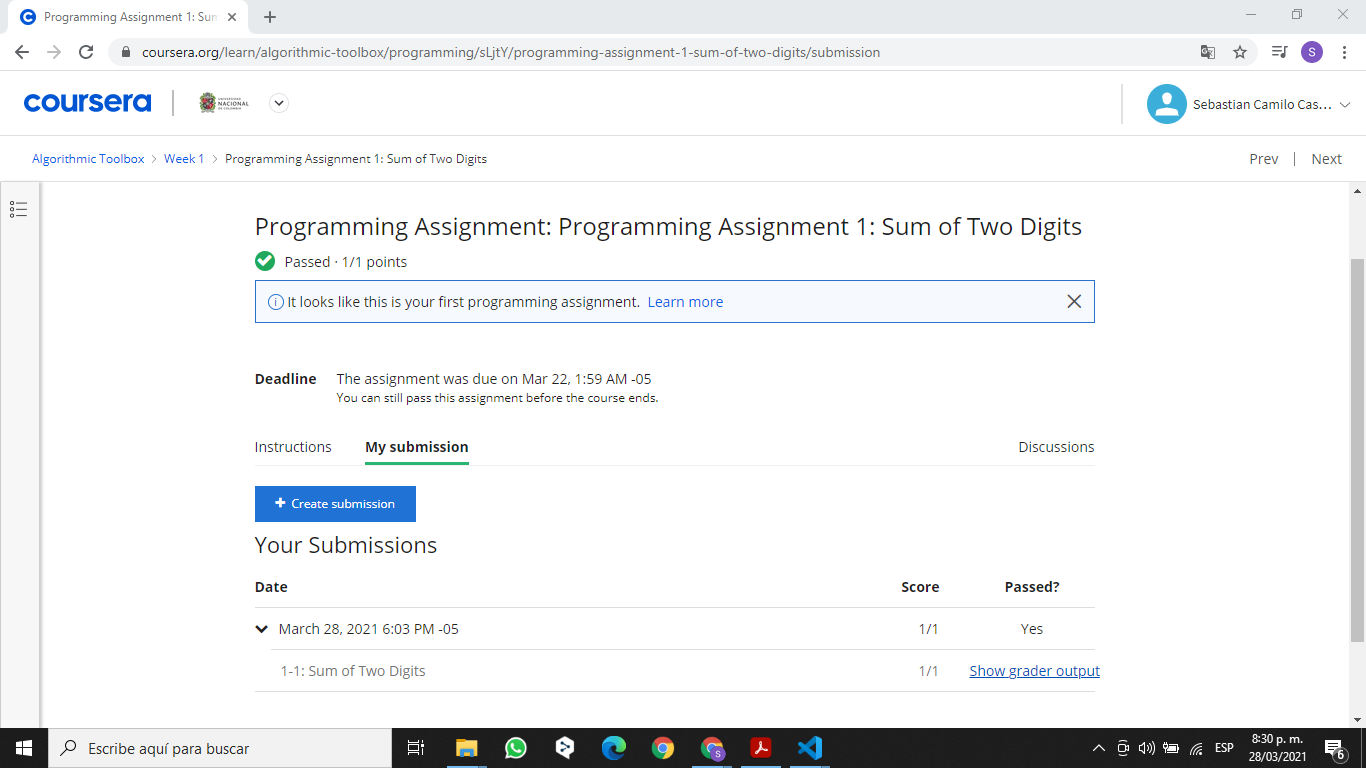

Maximum Pairwise Product:

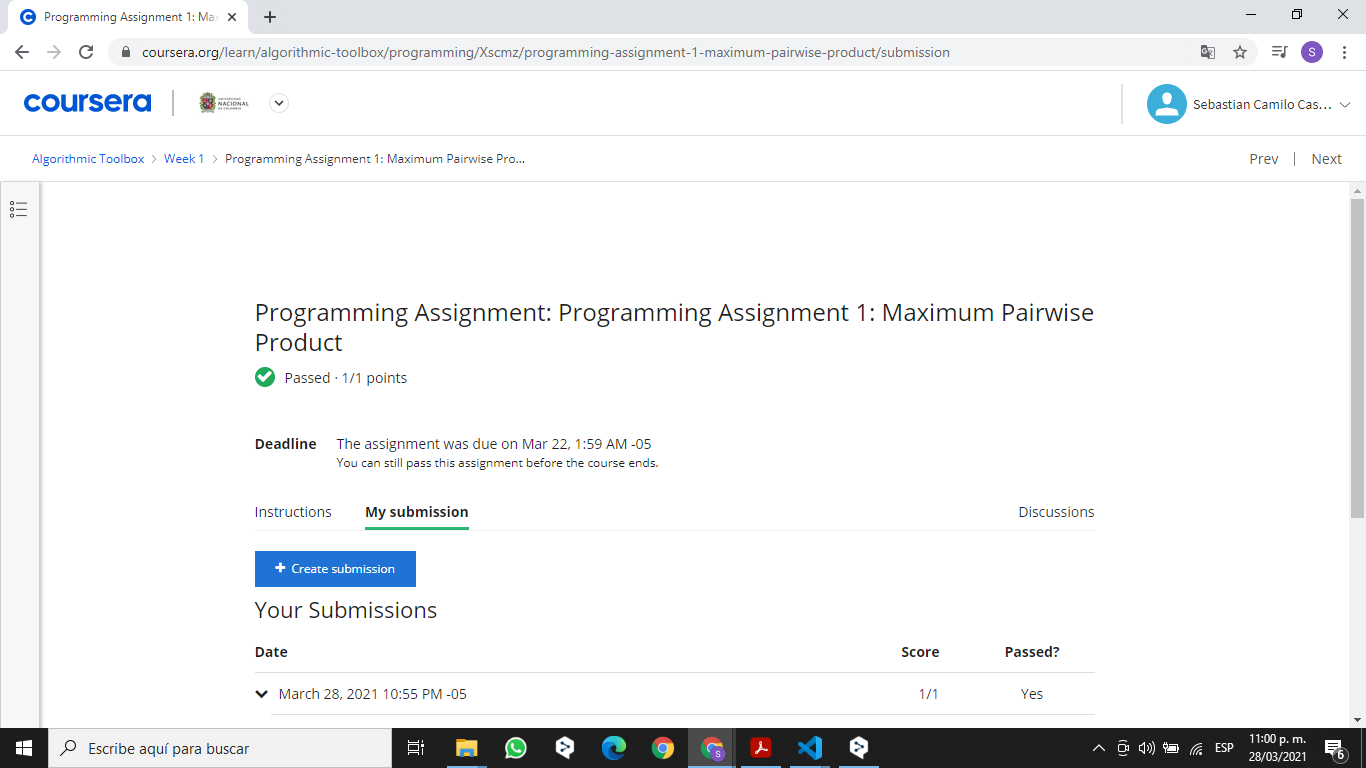